# Inference Tasks on Stellar Spectra to Stellar Parameters

In [1]:
!nvidia-smi

Sun Dec 29 13:07:52 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.216.01             Driver Version: 535.216.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-80GB          On  | 00000000:82:00.0 Off |                    0 |
| N/A   28C    P0              63W / 500W |      0MiB / 81920MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [2]:
from stellarperceptron.model import StellarPerceptron
import torch
print(torch.cuda.is_available())
import os

True


In [3]:
nn_model = StellarPerceptron.load("./model_torch_Xia/", device="cuda")
print(nn_model.vocabs)

['bp0', 'bp1', 'bp2', 'bp3', 'bp4', 'bp5', 'bp6', 'bp7', 'bp8', 'bp9', 'bp10', 'bp11', 'bp12', 'bp13', 'bp14', 'bp15', 'bp16', 'bp17', 'bp18', 'bp19', 'bp20', 'bp21', 'bp22', 'bp23', 'bp24', 'bp25', 'bp26', 'bp27', 'bp28', 'bp29', 'bp30', 'bp31', 'bp32', 'bp33', 'bp34', 'bp35', 'bp36', 'bp37', 'bp38', 'bp39', 'bp40', 'bp41', 'bp42', 'bp43', 'bp44', 'bp45', 'bp46', 'bp47', 'bp48', 'bp49', 'bp50', 'bp51', 'bp52', 'bp53', 'bp54', 'rp0', 'rp1', 'rp2', 'rp3', 'rp4', 'rp5', 'rp6', 'rp7', 'rp8', 'rp9', 'rp10', 'rp11', 'rp12', 'rp13', 'rp14', 'rp15', 'rp16', 'rp17', 'rp18', 'rp19', 'rp20', 'rp21', 'rp22', 'rp23', 'rp24', 'rp25', 'rp26', 'rp27', 'rp28', 'rp29', 'rp30', 'rp31', 'rp32', 'rp33', 'rp34', 'rp35', 'rp36', 'rp37', 'rp38', 'rp39', 'rp40', 'rp41', 'rp42', 'rp43', 'rp44', 'rp45', 'rp46', 'rp47', 'rp48', 'rp49', 'rp50', 'rp51', 'rp52', 'rp53', 'rp54', 'bprp', 'jh', 'jk', 'teff', 'logg', 'm_h', 'logebv', 'g_fakemag']


In [4]:
nn_model.perceive?

Signature:
nn_model.perceive(
    inputs: Union[List[float], numpy.ndarray[Any, numpy.dtype[+_ScalarType_co]]],
    inputs_token: List[Union[str, int]],
    batch_size: int = 1024,
    return_attention_scores: bool = False,
    inference_mode: bool = True,
) -> None
Docstring:
This function to initiate perception of stars in the model

Parameters
----------
inputs : array-like
    The input data to be perceived. The shape of the input data should be (n_samples, n_features).
    If it is pandas DataFrame, the column names should be vacobs understood by the model.
inputs_token: list, optional
    Tokens or names of input data.
batch_size: int, optional
    The batch size for neural network. Default is 1024.
return_attention_scores: bool, optional
    Whether to return attention scores. Default is False.
inference_mode: bool, optional
    Whether to set the model to inference mode to save memory. Default is True. Set it to False if you want gradient to flow for example.

Returns
-------
N

In [5]:
nn_model.perceive([[4700,2.5],[5500,4.2]],['teff', 'logg'])

In [6]:
print(nn_model.request(["teff"]))

          teff  teff_error
0  4700.358328    0.055793
1  5494.763471    0.307052


In [7]:
# !export MY_ASTRO_DATA="/global/homes/b/binxia/scratch"
os.environ["MY_ASTRO_DATA"] = "/global/homes/b/binxia/scratch"
!echo $MY_ASTRO_DATA

/global/homes/b/binxia/scratch


In [8]:
import numpy as np
from utils.gaia_utils import xp_spec_online
from stellarperceptron.model import StellarPerceptron

2024-12-29 13:08:04.487683: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735495684.501016  556472 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735495684.505148  556472 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-29 13:08:04.520432: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
gdr3_source_id = 2130706307446806144
bprp_coeffs = xp_spec_online(gdr3_source_id, absolute_flux=False)
nn_model = StellarPerceptron.load("./model_torch_Xia/", device="cuda")

In [10]:
bp = bprp_coeffs['bp'][:32]
rp = bprp_coeffs['rp'][:32]
bp_list = [f"bp{i}" for i in range(32)]
rp_list = [f"rp{i}" for i in range(32)]

In [11]:
print(bp.shape)
print(rp.shape)
# print(bp)
print(bp_list)
print(rp_list)
print(*bp_list, *rp_list)
print([*bp_list, *rp_list])
print(len([*bp_list, *rp_list]))
print(bp_list+rp_list)
print(bp_list + rp_list == [*bp_list, *rp_list])

(32,)
(32,)
['bp0', 'bp1', 'bp2', 'bp3', 'bp4', 'bp5', 'bp6', 'bp7', 'bp8', 'bp9', 'bp10', 'bp11', 'bp12', 'bp13', 'bp14', 'bp15', 'bp16', 'bp17', 'bp18', 'bp19', 'bp20', 'bp21', 'bp22', 'bp23', 'bp24', 'bp25', 'bp26', 'bp27', 'bp28', 'bp29', 'bp30', 'bp31']
['rp0', 'rp1', 'rp2', 'rp3', 'rp4', 'rp5', 'rp6', 'rp7', 'rp8', 'rp9', 'rp10', 'rp11', 'rp12', 'rp13', 'rp14', 'rp15', 'rp16', 'rp17', 'rp18', 'rp19', 'rp20', 'rp21', 'rp22', 'rp23', 'rp24', 'rp25', 'rp26', 'rp27', 'rp28', 'rp29', 'rp30', 'rp31']
bp0 bp1 bp2 bp3 bp4 bp5 bp6 bp7 bp8 bp9 bp10 bp11 bp12 bp13 bp14 bp15 bp16 bp17 bp18 bp19 bp20 bp21 bp22 bp23 bp24 bp25 bp26 bp27 bp28 bp29 bp30 bp31 rp0 rp1 rp2 rp3 rp4 rp5 rp6 rp7 rp8 rp9 rp10 rp11 rp12 rp13 rp14 rp15 rp16 rp17 rp18 rp19 rp20 rp21 rp22 rp23 rp24 rp25 rp26 rp27 rp28 rp29 rp30 rp31
['bp0', 'bp1', 'bp2', 'bp3', 'bp4', 'bp5', 'bp6', 'bp7', 'bp8', 'bp9', 'bp10', 'bp11', 'bp12', 'bp13', 'bp14', 'bp15', 'bp16', 'bp17', 'bp18', 'bp19', 'bp20', 'bp21', 'bp22', 'bp23', 'bp24', 'bp

In [12]:
# nn_model.perceive(np.concatenate([bp,rp]), [*bp_list,*rp_list])
nn_model.perceive(np.concatenate([bp,rp]), bp_list+rp_list)

In [13]:
print(nn_model.request(['teff', 'logg', 'm_h']))

          teff      logg      m_h  teff_error  logg_error  m_h_error
0  4682.136639  2.442531  0.05058   24.728177    0.057185   0.035907


In [14]:
import pylab as plt
from stellarperceptron.model import StellarPerceptron
from utils.gaia_utils import nn_xp_coeffs_phys, xp_sampling_grid
plt.rcParams["text.usetex"] = False

In [15]:
nn_model = StellarPerceptron.load("./model_torch/", device="cuda")
nn_model_Xia = StellarPerceptron.load("./model_torch_Xia/", device="cuda")
# nn_model_search = StellarPerceptron.load("./model_torch_search/", device="cuda")
spectrum0 = nn_xp_coeffs_phys(nn_model, absolute_flux=True, teff=4700, logg=2.5, m_h=0.0, logebv=-7)
spectrum1 = nn_xp_coeffs_phys(nn_model_Xia, absolute_flux=True, teff=4700, logg=2.5, m_h=0.0, logebv=-7)
# spectrum2 = nn_xp_coeffs_phys(nn_model_search, absolute_flux=True, teff=4700, logg=2.5, m_h=0.0, logebv=-7)
spectrum2 = nn_xp_coeffs_phys(nn_model, absolute_flux=True, teff=4400, logg=2, m_h=0.05, logebv=-9)

In [16]:
print(spectrum0.shape)
print(xp_sampling_grid.shape)
print(xp_sampling_grid[0], xp_sampling_grid[-1], xp_sampling_grid.min(), xp_sampling_grid.max())

(343,)
(343,)
336.0 1020.0 336.0 1020.0


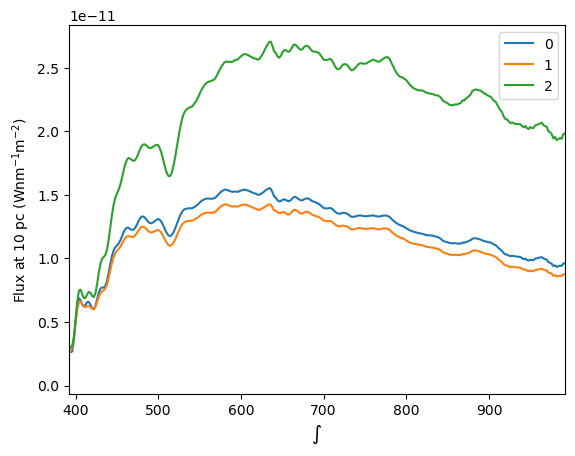

In [17]:
plt.plot(xp_sampling_grid, spectrum0, label='0')
plt.plot(xp_sampling_grid, spectrum1, label='1')
plt.plot(xp_sampling_grid, spectrum2, label='2')
plt.xlabel("$\\int$")
plt.ylabel("Flux at 10 pc ($\\mathrm{W} \\mathrm{nm}^{-1} \\mathrm{m}^{-2}$)")
plt.xlim(392, 992)
plt.legend()
plt.show()
# plt.close()

In [18]:
# !nvidia-smi

In [41]:
import h5py
import copy
import torch
import pylab as plt
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from astropy.stats import mad_std
from astroNN.gaia import fakemag_to_pc
from sklearn.preprocessing import StandardScaler
from astroNN.shared.matplotlib import pylab_style
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

from stellarperceptron.model import StellarPerceptron

from utils.data_utils import shuffle_row
from utils.plotting_utils import plot_kiel_uncertainty, top_cbar

pylab_style(paper=True)

# ================== hardware-related settings ==================
device = "cuda"  # "cpu" for CPU or "cuda:x" for a NVIDIA GPU
mixed_precision = True
torch.backends.cuda.matmul.allow_tf32 = False
torch.backends.cudnn.allow_tf32 = False
# ================== hardware-related settings ==================

nn_model = StellarPerceptron.load(
    "./model_torch_Xia/", mixed_precision=mixed_precision, device=device
)

xp_apogee_testing = h5py.File("./data_files/testing_set.h5", mode="r")
xp_apogee_training = h5py.File("./data_files/training_set.h5", mode="r")

# this notebook is about inference from XP spectra, so we at least need XP spectra and APOGEE labels
good_idx = (
    (np.sum(np.isnan(xp_apogee_testing["raw"]["xp_coeffs_gnorm"][()]), axis=1) == 0)
    & ~np.isnan(xp_apogee_testing["raw"]["teff"][()])
    & ~np.isnan(xp_apogee_testing["raw"]["logg"][()])
    & ~np.isnan(xp_apogee_testing["raw"]["m_h"][()])
)

val_labels = np.column_stack(
    [
        xp_apogee_testing["raw"]["xp_coeffs_gnorm"][()],
        xp_apogee_testing["raw"]["bprp"][()],
        xp_apogee_testing["raw"]["jh"][()],
        xp_apogee_testing["raw"]["jk"][()],
        xp_apogee_testing["raw"]["teff"][()],
        xp_apogee_testing["raw"]["logg"][()],
        xp_apogee_testing["raw"]["m_h"][()],
        xp_apogee_testing["raw"]["logc19"][()],
        xp_apogee_testing["raw"]["g_fakemag"][()],
    ]
)[good_idx]

obs_names = np.stack(
    [
        *[f"bp{i}" for i in range(55)],
        *[f"rp{i}" for i in range(55)],
        "bprp",
        "jh",
        "jk",
        "teff",
        "logg",
        "m_h",
        "logebv",
        "g_fakemag",
    ]
)

# create pandas DataFrame for validation set
val_labels_pd = pd.DataFrame(data=val_labels, columns=obs_names)
test_data_length = len(val_labels_pd)

In [42]:
# import matplotlib.pyplot as pl
print(xp_apogee_testing["raw"]["xp_coeffs_gnorm"][:200].shape)
# pl.imshow(xp_apogee_testing["raw"]["xp_coeffs_gnorm"][:200])

(200, 110)


In [43]:
print(xp_apogee_testing['raw']['bprp'].shape)
print(xp_apogee_testing['raw']['jh'].shape)

(44080,)
(44080,)


In [44]:
good_idx[:20]

array([ True,  True,  True,  True, False,  True, False, False,  True,
        True, False,  True,  True, False, False, False,  True, False,
        True,  True])

In [45]:
xp_apogee_testing['raw']['teff'][()]

array([4945.292 , 4980.67  , 4363.732 , ..., 4907.3154,       nan,
       4598.9307], dtype='>f4')

In [46]:
val_labels.shape

(25193, 118)

In [47]:
val_labels

array([[ 5.48593891e-02,  1.32421433e-03, -2.26363482e-03, ...,
        -4.06529993e-01, -1.56064778e+00,  1.71890474e+02],
       [ 6.24799938e-02, -4.75942250e-03, -2.00570918e-03, ...,
        -2.25620002e-01, -7.00000000e+00,  4.44939087e+02],
       [ 5.50770498e-02,  2.92413558e-03, -3.10911652e-03, ...,
        -1.10579997e-01, -2.65926003e+00,  8.23316669e+01],
       ...,
       [ 6.21359988e-02, -3.43265122e-03, -2.35099170e-03, ...,
         1.13770001e-01, -3.50655792e+00,  5.35913735e+02],
       [ 4.87367111e-02,  4.91003228e-03, -2.40535667e-03, ...,
        -4.47910018e-02, -8.91598128e-01,  2.01855348e+02],
       [ 5.71825456e-02,  1.45933041e-04, -2.58065157e-03, ...,
         3.16420011e-02, -1.69805773e+00,  1.49207636e+02]])

In [48]:
val_labels_pd

,bp0,bp1,bp2,bp3,bp4,bp5,bp6,bp7,bp8,bp9,...,rp53,rp54,bprp,jh,jk,teff,logg,m_h,logebv,g_fakemag
0,0.054859,0.001324,-0.002264,0.000281,-0.000589,0.000389,-0.000204,0.000043,0.000006,0.000077,...,9.239892e-07,7.890132e-07,1.451401,0.555000,0.689,4945.291992,2.449535,-0.406530,-1.560648,171.890474
1,0.062480,-0.004759,-0.002006,0.000767,-0.000352,-0.000508,-0.000283,0.000149,-0.000120,-0.000043,...,1.270948e-06,1.657307e-06,1.087400,0.481000,0.585,4980.669922,3.569068,-0.225620,-7.000000,444.939087
2,0.055077,0.002924,-0.003109,0.000354,-0.000326,0.000100,-0.000233,0.000146,-0.000055,0.000046,...,-2.024246e-06,6.886936e-07,1.485900,0.702000,0.851,4363.731934,1.839854,-0.110580,-2.659260,82.331667
3,0.068153,-0.015031,0.001135,0.000054,-0.000253,-0.000269,-0.000032,0.000008,0.000055,-0.000022,...,-6.377969e-07,3.949887e-07,0.696400,0.197001,0.269,6260.743652,4.016380,-0.001891,-2.407946,404.114836
4,0.026842,0.008689,-0.000393,-0.001731,-0.000050,0.000370,-0.000084,0.000018,0.000143,0.000169,...,-3.745035e-07,-5.326472e-06,2.791500,1.133000,1.512,4128.979980,1.153286,-0.431070,-0.094311,158.417935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25188,0.049801,0.002986,-0.001700,-0.000386,-0.000761,0.000834,-0.000044,0.000122,0.000063,0.000040,...,-2.098622e-06,2.731667e-06,1.646300,0.638000,0.766,4929.528320,1.841725,-1.547800,-0.941609,100.403148
25189,0.059775,-0.001175,-0.002753,0.000771,-0.000482,-0.000328,-0.000344,0.000214,-0.000072,0.000024,...,3.077870e-06,1.115946e-06,1.250100,0.555000,0.658,4639.187500,2.581833,-0.140900,-7.000000,178.652474
25190,0.062136,-0.003433,-0.002351,0.000720,-0.000335,-0.000555,-0.000331,0.000146,-0.000069,0.000048,...,1.709588e-06,8.098865e-07,1.129100,0.448000,0.524,4971.927246,3.611207,0.113770,-3.506558,535.913735
25191,0.048737,0.004910,-0.002405,-0.000211,-0.000547,0.000753,-0.000081,-0.000060,0.000029,0.000035,...,-1.186202e-06,1.702988e-06,1.727400,0.635000,0.834,4907.315430,2.620791,-0.044791,-0.891598,201.855348


In [49]:
x = torch.randn(3,4)

In [50]:
x.device

device(type='cpu')

In [51]:
y = x.to(device)

In [52]:
print(x.device, y.device)

cpu cuda:0


In [53]:
plt.rcParams['text.usetex'] = False  # 禁用 LaTeX
plt.rcParams['font.family'] = 'sans-serif'  # 使用非 LaTeX 字体
plt.rcParams['mathtext.fontset'] = 'stix'  # 使用 Matplotlib 内置数学字体

<class 'torch.Tensor'> <class 'torch.Tensor'>


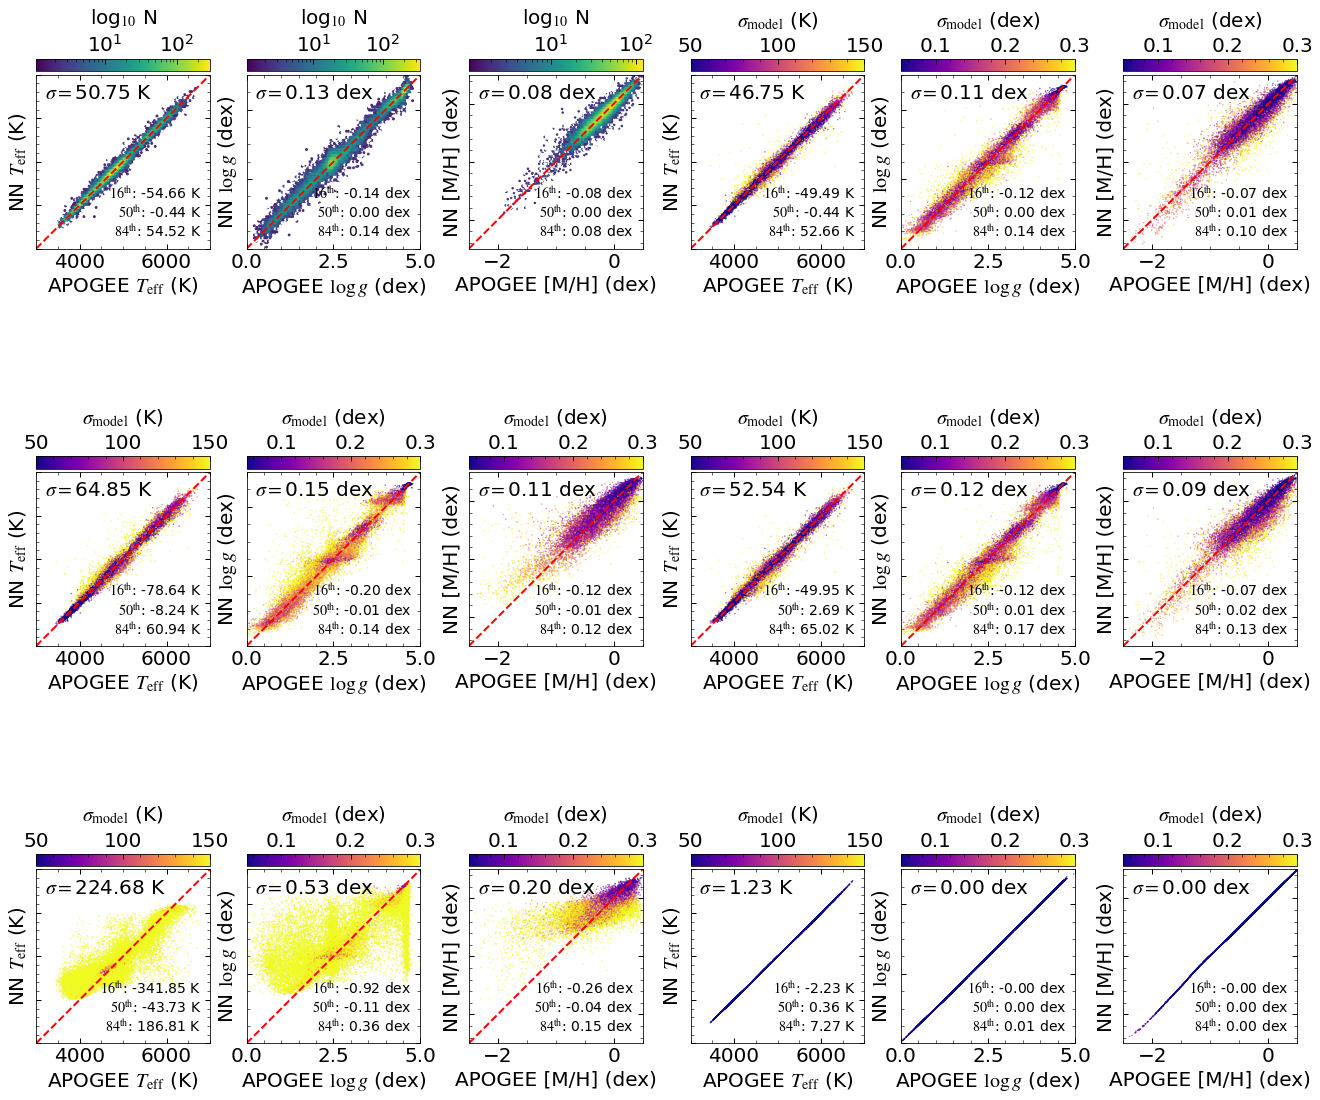

In [54]:
fig = plt.figure(constrained_layout=True, figsize=(18.0, 16.5))
bigsubfigs = fig.subfigures(3, 1, wspace=0.1, hspace=0.01)
subfigs_r0 = bigsubfigs[0].subfigures(1, 2)
subfigs_r1 = bigsubfigs[1].subfigures(1, 2)
subfigs_r2 = bigsubfigs[2].subfigures(1, 2)

# ==============================================================================
col_names = [
    *[f"bp{i}" for i in range(30)],
    *[f"rp{i}" for i in range(30)],
    *["jh", "jk", "bprp"],
]

val_labels_shuffled = val_labels_pd[col_names]
val_labels_names = np.tile(col_names, (test_data_length, 1))
scaler_y = StandardScaler()
scaled_labels = scaler_y.fit_transform(
    np.column_stack(
        [
            xp_apogee_training["raw"]["teff"][()],
            xp_apogee_training["raw"]["logg"][()],
            xp_apogee_training["raw"]["m_h"][()],
        ]
    )
)

# training_labels = crop_xp(xp_apogee["normalized"]["bprp_coeffs"][()][good_idx], 80, mode="end")
scaler_x = StandardScaler()
scaled_inputs = scaler_x.fit_transform(
    np.column_stack(
        [
            xp_apogee_training["raw"]["xp_coeffs_gnorm"][:, :30],
            xp_apogee_training["raw"]["xp_coeffs_gnorm"][:, 55:85],
            xp_apogee_training["raw"]["jh"],
            xp_apogee_training["raw"]["jk"],
            xp_apogee_training["raw"]["bprp"],
        ]
    )
)

xgboost_reg = XGBRegressor(device="cuda", n_estimators=2000)
xg_good_idx = (~np.isnan(scaled_inputs)).all(axis=1) & (~np.isnan(scaled_labels)).all(
    axis=1
)

# print(scaled_inputs.type, scaled_labels.type)
scaled_labels = torch.tensor(scaled_labels).to(device)
scaled_inputs = torch.tensor(scaled_inputs).to(device)
xg_good_idx = torch.tensor(xg_good_idx).to(device)
print(type(scaled_labels), type(scaled_inputs))

xgboost_reg.fit(scaled_inputs[xg_good_idx], scaled_labels[xg_good_idx])

xg_good_idx = (~np.isnan(val_labels_shuffled)).all(axis=1) & (
    ~np.isnan(val_labels_shuffled)
).all(axis=1)
ys_pred = scaler_y.inverse_transform(
    xgboost_reg.predict(scaler_x.transform(val_labels_shuffled.to_numpy()))
)
pred_df = {"teff": ys_pred[:, 0], "logg": ys_pred[:, 1], "m_h": ys_pred[:, 2]}

ax1, ax2, ax3 = plot_kiel_uncertainty(
    val_labels_pd,
    pred_df=pred_df,
    # suptitle="(a) $\\textbf{Expert XGBoost Model (Baseline)}$\n$\\textbf{Inputs:}$ BP[0-29], RP[0-29], $J-H$, $J-K$, $G_\\mathrm{BP}-G_\\mathrm{RP}$\n$\\textbf{Output:}$ $T_\\mathrm{eff}$, $\\log{g}$, [M/H]",
    fig=subfigs_r0[0],
    density=True,
    show_percentiles=True,
)
# ax1.set_ylabel("XGBoost $T_\\mathrm{eff}$ (K)")
# ax2.set_ylabel("XGBoost $\\log{g}$ (dex)")
# ax3.set_ylabel("XGBoost [M/H] (dex)")

# ==============================================================================
# print(val_labels_shuffled.device)
# print(val_labels_names.device)
nn_model.perceive(
    val_labels_shuffled,
    val_labels_names,
)
pred_df = nn_model.request(["teff", "m_h", "logg"])
nn_model.clear_perception()
plot_kiel_uncertainty(
    val_labels_pd,
    pred_df=pred_df,
    # suptitle="(b) $\\textbf{NN Model}$\n$\\textbf{Inputs:}$ BP[0-29], RP[0-29], $J-H$, $J-K$, $G_\\mathrm{BP}-G_\\mathrm{RP}$\n$\\textbf{Request:}$ $T_\\mathrm{eff}$, $\\log{g}$, [M/H]",
    fig=subfigs_r0[1],
    show_percentiles=True,
)
# ==============================================================================
col_names = [
    *[f"bp{i}" for i in range(0, 5)],
    *[f"rp{i}" for i in range(0, 5)],
    *["jh", "jk", "bprp"],
]
val_labels_shuffled = val_labels_pd[col_names]
val_labels_names = np.tile(col_names, (test_data_length, 1))
nn_model.perceive(
    val_labels_shuffled,
    val_labels_names,
)

pred_df = nn_model.request(["teff", "m_h", "logg"])
nn_model.clear_perception()
plot_kiel_uncertainty(
    val_labels_pd,
    pred_df=pred_df,
    # suptitle="(c) $\\textbf{NN Model}$\n$\\textbf{Inputs:}$ BP[0-4], RP[0-4], $J-H$, $J-K$, $G_\\mathrm{BP}-G_\\mathrm{RP}$\n$\\textbf{Request:}$ $T_\\mathrm{eff}$, $\\log{g}$, [M/H]",
    fig=subfigs_r1[0],
    show_percentiles=True,
)
# ==============================================================================
col_names = [
    *[f"bp{i}" for i in range(55)],
    *[f"rp{i}" for i in range(55)],
    *["jh", "jk", "bprp"],
]

val_labels_names = np.tile(col_names, (test_data_length, 1))
val_labels_shuffled = val_labels_pd[col_names].to_numpy()
shuffle_row([val_labels_shuffled, val_labels_names])
nn_model.perceive(
    val_labels_shuffled[:, : nn_model.context_length],
    val_labels_names[:, : nn_model.context_length],
)
pred_df = nn_model.request(["teff", "m_h", "logg"])
nn_model.clear_perception()
plot_kiel_uncertainty(
    val_labels_pd,
    pred_df=pred_df,
    # suptitle="(d) $\\textbf{NN Model}$\n$\\textbf{Inputs:}$ 64 random XP coefficients and colors for each star\n$\\textbf{Request:}$ $T_\\mathrm{eff}$, $\\log{g}$, [M/H]",
    fig=subfigs_r1[1],
    show_percentiles=True,
)
# ==============================================================================

col_names = [*[f"bp{i}" for i in range(25, 55)], *[f"rp{i}" for i in range(25, 55)]]

val_labels_shuffled = val_labels_pd[col_names]
val_labels_names = np.tile(col_names, (test_data_length, 1))
nn_model.perceive(
    val_labels_shuffled,
    val_labels_names,
)
pred_df = nn_model.request(["teff", "m_h", "logg"])
nn_model.clear_perception()
plot_kiel_uncertainty(
    val_labels_pd,
    pred_df=pred_df,
    # suptitle="(e) $\\textbf{NN Model}$\n$\\textbf{Inputs:}$ BP[25-54], RP[25-54]\n$\\textbf{Request:}$ $T_\\mathrm{eff}$, $\\log{g}$, [M/H]",
    fig=subfigs_r2[0],
    show_percentiles=True,
)
# ==============================================================================

col_names = [
    *[f"bp{i}" for i in range(25, 55)],
    *["teff", "logg", "m_h"],
    *[f"rp{i}" for i in range(25, 55)],
]
val_labels_shuffled = val_labels_pd[col_names]
val_labels_names = np.tile(col_names, (test_data_length, 1))
val_labels_shuffled = val_labels_shuffled.to_numpy()
shuffle_row([val_labels_shuffled, val_labels_names])
nn_model.perceive(
    val_labels_shuffled,
    val_labels_names,
)
pred_df = nn_model.request(["teff", "m_h", "logg"])
nn_model.clear_perception()
plot_kiel_uncertainty(
    val_labels_pd,
    pred_df=pred_df,
    # suptitle="(f) $\\textbf{NN Model}$\n$\\textbf{Inputs:}$ BP[25-54], RP[25-54], $T_\\mathrm{eff}$, $\\log{g}$, [M/H] in random order for each star\n$\\textbf{Request:}$ $T_\\mathrm{eff}$, $\\log{g}$, [M/H]",
    plot_one_to_one=False,
    fig=subfigs_r2[1],
    show_percentiles=True,
)
# fig.savefig("./figs/teff_logg_mh.jpg", bbox_inches="tight", dpi=200)
plt.show()

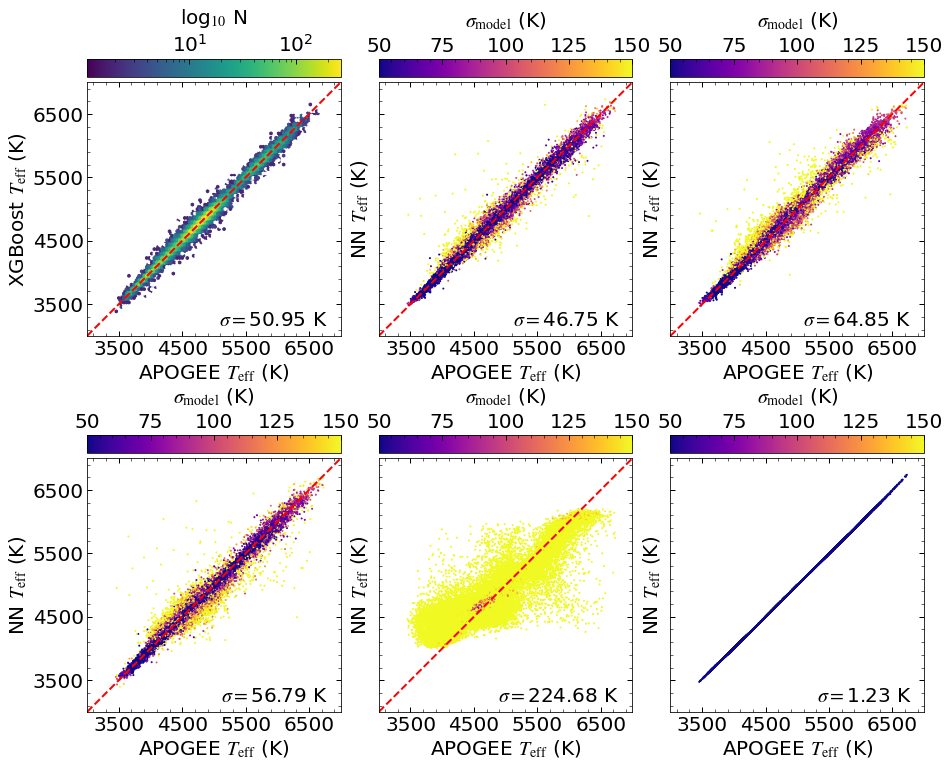

In [55]:
def plot_teff(ax, x, y, y_err=None, cmap="plasma", text=None, plot121=True):
    if y_err is None:
        custom_cmap = copy.copy(plt.get_cmap(cmap))
        custom_cmap.set_under(color="white")
        mappable = ax.hexbin(
            x,
            y,
            bins="log",
            extent=[3000, 7000, 3000, 7000],
            cmap=custom_cmap,
            vmin=1.1,
            rasterized=True,
        )
        top_cbar(ax, mappable, "log$_{10}$ N", labelpad=10)
    else:
        mappable = ax.scatter(
            x,
            y,
            c=y_err,
            cmap=cmap,
            vmin=50,
            vmax=150,
            s=1,
            rasterized=True,
        )
        top_cbar(ax, mappable, "$\\sigma_\\mathrm{model}$ (K)", labelpad=10)
    if plot121:
        ax.plot([3000, 7000], [3000, 7000], lw=2, ls="--", c="r")

    if text:
        ax.annotate(
            text, xy=(0.05, 0.95), xycoords=ax, fontsize=14, ha="left", va="top"
        )
    ax.annotate(
        f"$\\sigma=${mad_std(x-y, ignore_nan=True):.2f} K",
        xy=(0.95, 0.1),
        xycoords=ax,
        fontsize=20,
        ha="right",
        va="top",
    )
    ax.plot([-1, 3], [-1, 3], lw=2, ls="--", c="r")
    ax.set_xlim(3000, 7000)
    ax.set_ylim(3000, 7000)
    ax.set_xticks([3500, 4500, 5500, 6500])
    ax.set_yticks([3500, 4500, 5500, 6500])
    ax.set_aspect("equal", "box")
    ax.set_xlabel("APOGEE $T_\\mathrm{eff}$ (K)")
    ax.set_ylabel("NN $T_\\mathrm{eff}$ (K)")
    return mappable


fig = plt.figure(figsize=(15.0, 12.0))
subfigs = fig.subfigures(1, 1)
(subfigs_r0, subfigs_r1) = subfigs.subplots(
    2, 3, gridspec_kw={"wspace": 0.15, "hspace": 0.30}
)

# ==============================================================================
col_names = [
    *[f"bp{i}" for i in range(30)],
    *[f"rp{i}" for i in range(30)],
    *["jh", "jk", "bprp"],
]
val_labels_shuffled = val_labels_pd[col_names]
val_labels_names = np.tile(col_names, (test_data_length, 1))
scaler_y = StandardScaler()
scaled_labels = scaler_y.fit_transform(
    np.column_stack(
        [
            xp_apogee_training["raw"]["teff"][()],
            xp_apogee_training["raw"]["logg"][()],
            xp_apogee_training["raw"]["m_h"][()],
        ]
    )
)

# training_labels = crop_xp(xp_apogee["normalized"]["bprp_coeffs"][()][good_idx], 80, mode="end")
scaler_x = StandardScaler()
scaled_inputs = scaler_x.fit_transform(
    np.column_stack(
        [
            xp_apogee_training["raw"]["xp_coeffs_gnorm"][:, :30],
            xp_apogee_training["raw"]["xp_coeffs_gnorm"][:, 55:85],
            xp_apogee_training["raw"]["jh"],
            xp_apogee_training["raw"]["jk"],
            xp_apogee_training["raw"]["bprp"],
        ]
    )
)

xgboost_reg = XGBRegressor(device="cuda", n_estimators=2000)
xg_good_idx = (~np.isnan(scaled_inputs)).all(axis=1) & (~np.isnan(scaled_labels)).all(
    axis=1
)
xgboost_reg.fit(scaled_inputs[xg_good_idx], scaled_labels[xg_good_idx])

xg_good_idx = (~np.isnan(val_labels_shuffled)).all(axis=1) & (
    ~np.isnan(val_labels_shuffled)
).all(axis=1)
ys_pred = scaler_y.inverse_transform(
    xgboost_reg.predict(scaler_x.transform(val_labels_shuffled.to_numpy()))
)
pred_df = {"teff": ys_pred[:, 0]}

plot_teff(
    subfigs_r0[0],
    val_labels_pd["teff"],
    pred_df["teff"],
    cmap="viridis",
    # text="$\\textbf{Expert XGBoost (Baseline)}$\n$\\textbf{Inputs:}$ BP[0-29], RP[0-29], \n$J-H$, $J-K$, $G_\\mathrm{BP}-G_\\mathrm{RP}$\n$\\textbf{Output:}$ $T_\\mathrm{eff}$",
)
subfigs_r0[0].set_ylabel("XGBoost $T_\\mathrm{eff}$ (K)")
# ==============================================================================
nn_model.perceive(
    val_labels_shuffled,
    val_labels_names,
)
pred_df = nn_model.request(["teff"])
nn_model.clear_perception()
plot_teff(
    subfigs_r0[1],
    val_labels_pd["teff"],
    pred_df["teff"],
    pred_df["teff_error"],
    # text="$\\textbf{NN Model}$\n$\\textbf{Inputs:}$ BP[0-29], RP[0-29], \n$J-H$, $J-K$, $G_\\mathrm{BP}-G_\\mathrm{RP}$\n$\\textbf{Request:}$ $T_\\mathrm{eff}$",
)
subfigs_r0[1].set_yticklabels([])
# ==============================================================================
col_names = [
    *[f"bp{i}" for i in range(0, 5)],
    *[f"rp{i}" for i in range(0, 5)],
    *["jh", "jk", "bprp"],
]
val_labels_shuffled = val_labels_pd[col_names]
val_labels_names = np.tile(col_names, (test_data_length, 1))
nn_model.perceive(
    val_labels_shuffled,
    val_labels_names,
)
pred_df = nn_model.request(["teff"])
nn_model.clear_perception()
plot_teff(
    subfigs_r0[2],
    val_labels_pd["teff"],
    pred_df["teff"],
    pred_df["teff_error"],
    # text="$\\textbf{NN Model}$\n$\\textbf{Inputs:}$ BP[0-4], RP[0-4], \n$J-H$, $J-K$, $G_\\mathrm{BP}-G_\\mathrm{RP}$\n$\\textbf{Request:}$ $T_\\mathrm{eff}$",
)
subfigs_r0[2].set_yticklabels([])
# ==============================================================================
col_names = [
    *[f"bp{i}" for i in range(55)],
    *[f"rp{i}" for i in range(55)],
    *["jh", "jk", "bprp"],
]

val_labels_names = np.tile(col_names, (test_data_length, 1))
val_labels_shuffled = val_labels_pd[col_names].to_numpy()
shuffle_row([val_labels_shuffled, val_labels_names])
nn_model.perceive(
    val_labels_shuffled[:, : nn_model.context_length],
    val_labels_names[:, : nn_model.context_length],
)
pred_df = nn_model.request(["teff"])
nn_model.clear_perception()
plot_teff(
    subfigs_r1[0],
    val_labels_pd["teff"],
    pred_df["teff"],
    pred_df["teff_error"],
    # text="$\\textbf{NN Model}$\n$\\textbf{Inputs:}$ 64 random XP \ncoefficients and colors \nfor each star\n$\\textbf{Request:}$ $T_\\mathrm{eff}$",
)

# ==============================================================================
col_names = [*[f"bp{i}" for i in range(25, 55)], *[f"rp{i}" for i in range(25, 55)]]

val_labels_shuffled = val_labels_pd[col_names]
val_labels_names = np.tile(col_names, (test_data_length, 1))
nn_model.perceive(
    val_labels_shuffled,
    val_labels_names,
)
pred_df = nn_model.request(["teff", "m_h", "logg"])
nn_model.clear_perception()
plot_teff(
    subfigs_r1[1],
    val_labels_pd["teff"],
    pred_df["teff"],
    pred_df["teff_error"],
    # text="$\\textbf{NN Model}$\n$\\textbf{Inputs:}$ BP[25-54], RP[25-54]\n$\\textbf{Request:}$ $T_\\mathrm{eff}$",
)
subfigs_r1[1].set_yticklabels([])
# ==============================================================================
col_names = [
    *[f"bp{i}" for i in range(25, 55)],
    *["teff", "logg", "m_h"],
    *[f"rp{i}" for i in range(25, 55)],
]
val_labels_shuffled = val_labels_pd[col_names]
val_labels_names = np.tile(col_names, (test_data_length, 1))
val_labels_shuffled = val_labels_shuffled.to_numpy()
shuffle_row([val_labels_shuffled, val_labels_names])
nn_model.perceive(
    val_labels_shuffled,
    val_labels_names,
)
pred_df = nn_model.request(["teff", "m_h", "logg"])
nn_model.clear_perception()
plot_teff(
    subfigs_r1[2],
    val_labels_pd["teff"],
    pred_df["teff"],
    pred_df["teff_error"],
    # text="$\\textbf{NN Model}$\n$\\textbf{Inputs:}$ BP[25-54], RP[25-54], \n$T_\\mathrm{eff}$, $\\log{g}$, [M/H] in random\norder for each star\n$\\textbf{Request:}$ $T_\\mathrm{eff}$",
    plot121=False,
)
subfigs_r1[2].set_yticklabels([])
# ==============================================================================

# fig.savefig("./figs/teff.pdf", bbox_inches="tight", dpi=200)
plt.show()

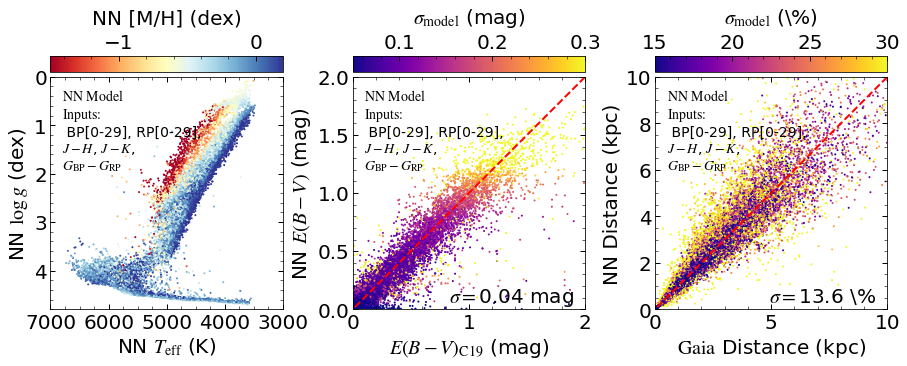

In [56]:
fig = plt.figure(figsize=(15.0, 6.0))
subfigs = fig.subfigures(1, 1)
(ax1, ax2, ax3) = subfigs.subplots(1, 3, gridspec_kw={"wspace": 0.3, "hspace": 0.0})

col_names = [
    *[f"bp{i}" for i in range(30)],
    *[f"rp{i}" for i in range(30)],
    *["jh", "jk", "bprp"],
]

val_labels_shuffled = val_labels_pd[col_names]
val_labels_names = np.tile(col_names, (test_data_length, 1))
nn_model.perceive(
    val_labels_shuffled,
    val_labels_names,
)
pred_df = nn_model.request(["teff", "m_h", "logg", "logebv", "g_fakemag"])
nn_model.clear_perception()

# need to manually scale teff so matplotlib works properly...
f = lambda teff: 4.8 * (np.asfarray(teff) - 3000) / 4000
mappable = ax1.scatter(
    f(pred_df["teff"]),
    pred_df["logg"],
    c=pred_df["m_h"],
    s=1,
    vmin=-1.5,
    vmax=0.2,
    cmap="RdYlBu",
    rasterized=True,
)
ax1.set_xlim(4.8, 0.0)
ax1.set_ylim(4.8, 0.0)
ax1.set_xticks(f([3000, 4000, 5000, 6000, 7000]))
# ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
ax1.set_xticklabels([3000, 4000, 5000, 6000, 7000])
ax1.set_xlabel("NN $T_\\mathrm{eff}$ (K)")
ax1.set_ylabel("NN $\\log{g}$ (dex)")
ax1.set_aspect("equal", "box")
top_cbar(ax1, mappable, "NN [M/H] (dex)", labelpad=10)
ax1.annotate(
    "$\\text{NN Model}$\n$\\text{Inputs:}$\n BP[0-29], RP[0-29], \n$J-H$, $J-K$, \n$G_\\mathrm{BP}-G_\\mathrm{RP}$",
    xy=(0.05, 0.95),
    xycoords=ax1,
    fontsize=14,
    ha="left",
    va="top",
)

mappable = ax2.scatter(
    np.exp(val_labels_pd["logebv"]),
    np.exp(pred_df["logebv"]),
    c=np.exp(pred_df["logebv"]) * pred_df["logebv_error"],
    s=1,
    vmin=0.05,
    vmax=0.3,
    cmap="plasma",
    rasterized=True,
)
ax2.annotate(
    f"$\\sigma=${mad_std(np.exp(val_labels_pd['logebv']) - np.exp(pred_df['logebv']), ignore_nan=True):.2f} mag",
    xy=(0.95, 0.1),
    xycoords=ax2,
    fontsize=20,
    ha="right",
    va="top",
)
ax2.plot([-999.0, 999], [-999.0, 999], c="r", lw=2, ls="--")
ax2.set_xlim(0, 2)
ax2.set_ylim(0, 2)
ax2.set_xlabel("$E(B-V)_\\mathrm{C19}$ (mag)")
ax2.set_ylabel("NN $E(B-V)$ (mag)")
ax2.set_aspect("equal", "box")
top_cbar(ax2, mappable, "$\\sigma_\\mathrm{model}$ (mag)", labelpad=10)
ax2.annotate(
    "$\\text{NN Model}$\n$\\text{Inputs:}$\n BP[0-29], RP[0-29], \n$J-H$, $J-K$, \n$G_\\mathrm{BP}-G_\\mathrm{RP}$",
    xy=(0.05, 0.95),
    xycoords=ax2,
    fontsize=14,
    ha="left",
    va="top",
)

gaia_dist_err = (
    xp_apogee_testing["raw"]["g_fakemag_err"][()][good_idx]
    / xp_apogee_testing["raw"]["g_fakemag"][()][good_idx]
)
good_parallax_idx = (
    xp_apogee_testing["raw"]["parallax_err"][()][good_idx]
    / xp_apogee_testing["raw"]["parallax"][()][good_idx]
    < 0.2
)
gaia_dist, gaia_dist_error = fakemag_to_pc(
    xp_apogee_testing["raw"]["g_fakemag"][()][good_idx][good_parallax_idx],
    xp_apogee_testing["raw"]["phot_g_mean_mag"][()][good_idx][good_parallax_idx],
    xp_apogee_testing["raw"]["g_fakemag_err"][()][good_idx][good_parallax_idx],
)
gaia_dist = gaia_dist.value
gaia_dist_error = gaia_dist_error.value

nn_dist, nn_dist_error = fakemag_to_pc(
    pred_df["g_fakemag"][good_parallax_idx],
    xp_apogee_testing["raw"]["phot_g_mean_mag"][()][good_idx][good_parallax_idx],
    pred_df["g_fakemag_error"][good_parallax_idx],
)
nn_dist = nn_dist.value

mappable = ax3.scatter(
    gaia_dist / 1000,
    nn_dist / 1000,
    c=100 * nn_dist_error / nn_dist,
    s=1,
    vmin=15,
    vmax=30,
    cmap="plasma",
    rasterized=True,
)
ax3.annotate(
    f"$\\sigma=${mad_std(100 * (gaia_dist - nn_dist) / gaia_dist, ignore_nan=True):.1f} \%",
    xy=(0.95, 0.1),
    xycoords=ax3,
    fontsize=20,
    ha="right",
    va="top",
)
ax3.plot([-999.0, 999], [-999.0, 999], c="r", lw=2, ls="--")
ax3.set_xlim(0, 10)
ax3.set_ylim(0, 10)
ax3.set_xlabel("$\\text{Gaia}$ Distance (kpc)")
ax3.set_ylabel("NN Distance (kpc)")
ax3.set_aspect("equal", "box")
top_cbar(ax3, mappable, "$\\sigma_\\mathrm{model}$ (\%)", labelpad=10)
ax3.annotate(
    "$\\text{NN Model}$\n$\\text{Inputs:}$\n BP[0-29], RP[0-29], \n$J-H$, $J-K$, \n$G_\\mathrm{BP}-G_\\mathrm{RP}$",
    xy=(0.05, 0.95),
    xycoords=ax3,
    fontsize=14,
    ha="left",
    va="top",
)

# fig.savefig("./figs/discriminate.pdf", bbox_inches="tight", dpi=200)
plt.show()

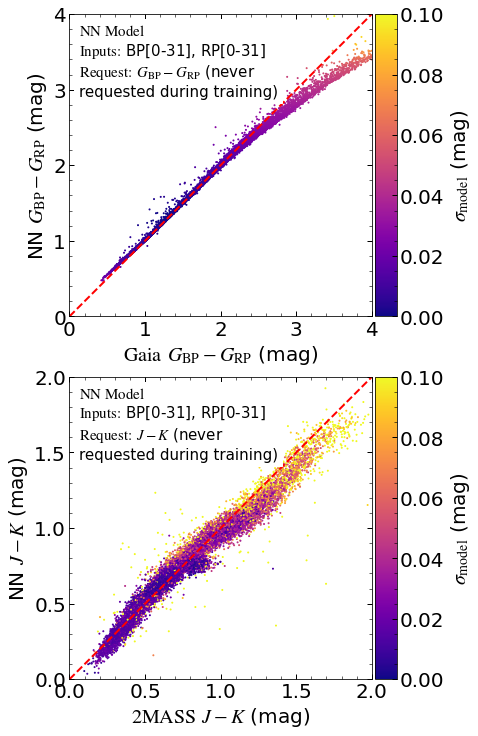

In [57]:
col_names = [*[f"bp{i}" for i in range(32)], *[f"rp{i}" for i in range(32)]]

val_labels_shuffled = val_labels_pd[col_names]
val_labels_names = np.tile(col_names, (test_data_length, 1))
nn_model.perceive(
    val_labels_shuffled,
    val_labels_names,
)
pred_df = nn_model.request(["bprp", "jk"])
nn_model.clear_perception()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6.5, 12.0))

mappable = ax1.scatter(
    val_labels_pd["bprp"],
    pred_df["bprp"],
    c=pred_df["bprp_error"],
    s=1,
    cmap="plasma",
    vmin=0,
    vmax=0.1,
    rasterized=True,
)
ax1.plot([0.0, 4.0], [0.0, 4.0], color="r", ls="--", lw=2.0)
ax1.set_xlabel("$\\text{Gaia}$ $G_\\mathrm{BP}-G_\\mathrm{RP}$ (mag)")
ax1.set_ylabel("NN $G_\\mathrm{BP}-G_\\mathrm{RP}$ (mag)")
ax1.set_xlim(0.0, 4.0)
ax1.set_ylim(0.0, 4.0)
ax1.annotate(
    "$\\text{NN Model}$\n$\\text{Inputs:}$ BP[0-31], RP[0-31]\n$\\text{Request:}$ $G_\\mathrm{BP}-G_\\mathrm{RP}$ (never\nrequested during training)",
    xy=(0.03, 0.97),
    xycoords=ax1,
    fontsize=15,
    ha="left",
    va="top",
    backgroundcolor="w",
)
ax1.set_aspect("equal", "box")
ax_divider = make_axes_locatable(ax1)
cax = ax_divider.append_axes("right", size="7%", pad=0.05)
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label("$\\sigma_\\mathrm{model}$ (mag)")

mappable = ax2.scatter(
    val_labels_pd["jk"],
    pred_df["jk"],
    c=pred_df["jk_error"],
    s=1,
    cmap="plasma",
    vmin=0,
    vmax=0.1,
    rasterized=True,
)
ax2.plot([0.0, 4.0], [0.0, 4.0], color="r", ls="--", lw=2.0)
ax2.set_xlabel("$\\text{2MASS}$ $J-K$ (mag)")
ax2.set_ylabel("NN $J-K$ (mag)")
ax2.set_xlim(0.0, 2.0)
ax2.set_ylim(0.0, 2.0)
ax2.annotate(
    "$\\text{NN Model}$\n$\\text{Inputs:}$ BP[0-31], RP[0-31]\n$\\text{Request:}$ $J-K$ (never\nrequested during training)",
    xy=(0.03, 0.97),
    xycoords=ax2,
    fontsize=15,
    ha="left",
    va="top",
    backgroundcolor="w",
)
ax2.set_aspect("equal", "box")
ax_divider = make_axes_locatable(ax2)
cax = ax_divider.append_axes("right", size="7%", pad=0.05)
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label("$\\sigma_\\mathrm{model}$ (mag)")
# fig.savefig("./figs/new_requests.pdf", bbox_inches="tight", dpi=200)
plt.show()